### Mutual Activation Mutual Inhibition Problem

In this problem, you are going to use the following system of equations representing self-feedback and mutual antagonism.
$$ \begin{align}
\frac{dx}{dt} & = a \frac{x^n}{0.5^n + x^n} - \left(1 + b \frac{y^n}{0.5^n + y^n} \right) x = f1(x,y)\\
\frac{dy}{dt} & = a \frac{y^n}{0.5^n + y^n} - \left(1 + b \frac{x^n}{0.5^n + x^n} \right) y = f2(x,y) 
\end{align}$$

You will be simulating this system using Julia's DifferentialEquations.jl. So you will need to create an appropriate function (see my lecture notes) and setup the appropriate simulation problem.

1) For a=1.0, b=2.0, n=4, visualize the vector field for this problem. I have provided code for this.

2) Simulate the equations twice from initial conditions [1.4,0.5] and [0.5, 1.4]. Visualize the simulation trajectories on top of the vector field. Plot them on top if it that is.

3) Both of these should converge to a steady state. If you take sol.u[end] in both cases, you will get a the final state of the trajectory. Plug this into your problem function and verify that you get a zero rate of change out. You are verifying that they are steady states.

4) Now use the Jacobian to verify that these two steady states are stable. In the written assignment you are asked to compute the four partial derivatives necessary for this Jacobian. If you code these four partial derivatives, you have now have a matrix of derivatives. Evaluate this matrix at each of the previously found steady states. For each of these Jacobians (each is just a 2x2 matrix now), find the maximum eigenvalue. Print the maximum eigenvalue in each case.

In [1]:
using Pkg
Pkg.status()

using LinearAlgebra, Plots, BenchmarkTools
using DifferentialEquations, ForwardDiff

Status `~/.julia/environments/v1.10/Project.toml`


  [0c46a032] DifferentialEquations v7.13.0
  [f0f68f2c] PlotlyJS v0.18.13
  [91a5bcdd] Plots v1.40.4
  [2913bbd2] StatsBase v0.34.3


ArgumentError: ArgumentError: Package BenchmarkTools not found in current path.
- Run `import Pkg; Pkg.add("BenchmarkTools")` to install the BenchmarkTools package.

In [3]:
using DifferentialEquations, Plots, LinearAlgebra

# Define the parameters
a = 1.0
b = 2.0
n = 4

# Define the system of differential equations
function system!(du, u, p, t)
    x, y = u
    du[1] = a * x^n / (0.5^n + x^n) - (1 + b * y^n / (0.5^n + y^n)) * x
    du[2] = a * y^n / (0.5^n + y^n) - (1 + b * x^n / (0.5^n + x^n)) * y
end

# Jacobian matrix calculation
function jacobian(x, y)
    J = zeros(2, 2)
    J[1, 1] = a * n * x^(n-1) * 0.5^n / (0.5^n + x^n)^2 - (1 + b * y^n / (0.5^n + y^n))
    J[1, 2] = -b * n * x * y^(n-1) * 0.5^n / (0.5^n + y^n)^2
    J[2, 1] = -b * n * y * x^(n-1) * 0.5^n / (0.5^n + x^n)^2
    J[2, 2] = a * n * y^(n-1) * 0.5^n / (0.5^n + y^n)^2 - (1 + b * x^n / (0.5^n + x^n))
    return J
end

# Initial conditions and time span
u0_1 = [1.4, 0.5]
u0_2 = [0.5, 1.4]
tspan = (0.0, 50.0)

# Solving the system for both initial conditions
prob1 = ODEProblem(system!, u0_1, tspan)
prob2 = ODEProblem(system!, u0_2, tspan)
sol1 = solve(prob1, Tsit5(), reltol=1e-8, abstol=1e-8)
sol2 = solve(prob2, Tsit5(), reltol=1e-8, abstol=1e-8)

# Function to plot vector field
function plot_vector_field()
    xrange = 0:0.1:2
    yrange = 0:0.1:2
    quiver(xrange, yrange, quiver=(x, y) -> (a * x^n / (0.5^n + x^n) - (1 + b * y^n / (0.5^n + y^n)) * x,
                                            a * y^n / (0.5^n + y^n) - (1 + b * x^n / (0.5^n + x^n)) * y))
end

# Plot vector field and trajectories
p = plot_vector_field()
plot!(p, sol1, idxs=(1, 2), label="Trajectory from [1.4, 0.5]", linewidth=2, color=:red)
plot!(p, sol2, idxs=(1, 2), label="Trajectory from [0.5, 1.4]", linewidth=2, color=:blue)

# Steady states
ss1 = sol1.u[end]
ss2 = sol2.u[end]
println("Steady state from [1.4, 0.5]: ", ss1)
println("Steady state from [0.5, 1.4]: ", ss2)

# Evaluating the Jacobian at steady states
J_ss1 = jacobian(ss1[1], ss1[2])
J_ss2 = jacobian(ss2[1], ss2[2])

# Find maximum eigenvalue for stability analysis
eigenvalues_ss1 = eigvals(J_ss1)
eigenvalues_ss2 = eigvals(J_ss2)
println("Maximum eigenvalue at steady state [1.4, 0.5]: ", maximum(real(eigenvalues_ss1)))
println("Maximum eigenvalue at steady state [0.5, 1.4]: ", maximum(real(eigenvalues_ss2)))



Steady state from [1.4, 0.5]: [0.9196433776070814, 1.48767919469964e-9]
Steady state from [0.5, 1.4]: [1.48767919469964e-9, 0.9196433776070814]
Maximum eigenvalue at steady state [1.4, 0.5]: -0.6785735104283237
Maximum eigenvalue at steady state [0.5, 1.4]: -0.6785735104283235


In [2]:
using DifferentialEquations, Plots

function MAct_MInh_rhs!(du, u, p, t)
    a, b, n = p
    x, y = u
    x_to_n = x^n
    y_to_n = y^n
    inhibition_x = b * x_to_n / (0.5^n + x_to_n)
    inhibition_y = b * y_to_n / (0.5^n + y_to_n)
    activation_x = a * x_to_n / (0.5^n + x_to_n)
    activation_y = a * y_to_n / (0.5^n + y_to_n)

    du[1] = activation_x - (1 + inhibition_y) * x
    du[2] = activation_y - (1 + inhibition_x) * y
end


┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = ErrorException("Required dependency DiffEqCallbacks [459566f4-90b8-5000-8ac3-15dfb0a30def] failed to load from a cache file.")
└ @ Base loading.jl:1992


MAct_MInh_rhs! (generic function with 1 method)

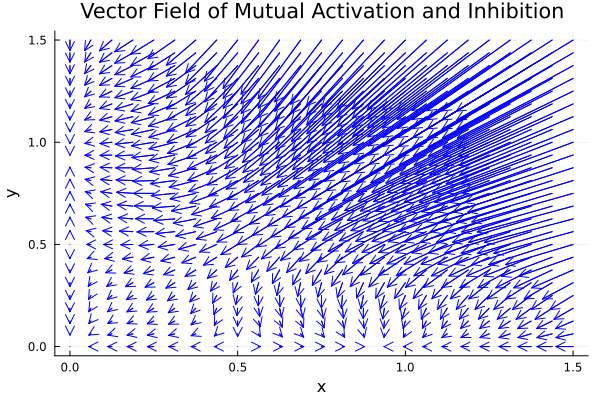

In [3]:
function plot_vf_2var(plt, xlimits, ylimits, fun!, p, scale, num_pts)
    yvals = LinRange(ylimits[1], ylimits[2], num_pts)
    xvals = LinRange(xlimits[1], xlimits[2], num_pts)

    for y in yvals
        for x in xvals
            u = [x, y]
            du = similar(u)
            fun!(du, u, p, 0.0)
            dx, dy = du[1], du[2]
            quiver!(plt, [x], [y], quiver=([dx*scale], [dy*scale]), linecolor=:blue)
        end
    end
    return plt
end

params = (1.0, 2.0, 4)  # a, b, n
plt = plot(xlabel="x", ylabel="y", title="Vector Field of Mutual Activation and Inhibition")
plot_vf_2var(plt, [0.0, 1.5], [0.0, 1.5], MAct_MInh_rhs!, params, 0.1, 25)


┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


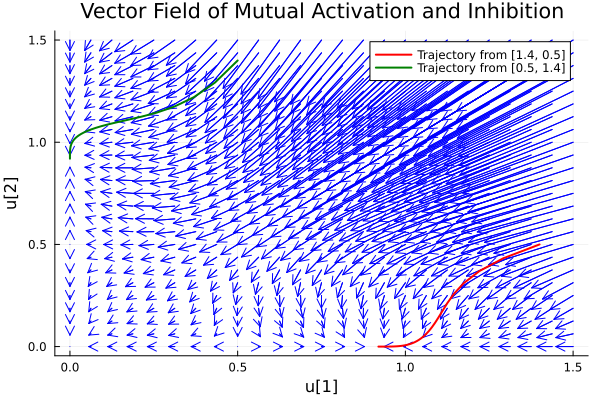

In [4]:
tspan = (0.0, 100.0)
u0 = [1.4, 0.5]
prob = ODEProblem(MAct_MInh_rhs!, u0, tspan, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
plot!(plt, sol, vars=(1,2), label="Trajectory from [1.4, 0.5]", linewidth=2, linecolor=:red)

u0 = [0.5, 1.4]
prob = ODEProblem(MAct_MInh_rhs!, u0, tspan, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
plot!(plt, sol, vars=(1,2), label="Trajectory from [0.5, 1.4]", linewidth=2, linecolor=:green)
